<a href="https://colab.research.google.com/github/KD-3/DeepLearningMovidiusNCS/blob/master/btp_cnn_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
!unzip "/gdrive/My Drive/Colab Notebooks/NEU-DET.zip" -d /content

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


DATADIR_IMAGES = "/content/NEU-DET/IMAGES"
DATADIR_ANNOTATIONS = "/content/NEU-DET/ANNOTATIONS"
print(DATADIR_ANNOTATIONS)
for img in os.listdir("/content/NEU-DET"):
    print(os.path.join("/content/NEU-DET", img))
    print(os.path.join(DATADIR_ANNOTATIONS, img))
    break

/content/NEU-DET/ANNOTATIONS
/content/NEU-DET/ANNOTATIONS
/content/NEU-DET/ANNOTATIONS/ANNOTATIONS


/content/NEU-DET/IMAGES/crazing_106.jpg


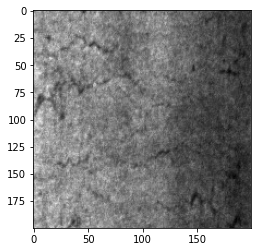

In [5]:
  for img in os.listdir(DATADIR_IMAGES):
    print(os.path.join(DATADIR_IMAGES, img))
    img_array = cv2.imread(os.path.join(DATADIR_IMAGES, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

In [0]:
from xml.etree import ElementTree

# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
  tree = ElementTree.parse(filename)
  root = tree.getroot()
  # extract each bounding box
  boxes = list()
  for box in root.findall('.//bndbox'):
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    coors = [xmin, ymin, xmax, ymax]
    boxes.append(coors)
  # extract image dimensions
  width = int(root.find('.//size/width').text)
  height = int(root.find('.//size/height').text)
  return boxes, width, height

In [7]:
  for img in os.listdir(DATADIR_ANNOTATIONS):
    print(os.path.join(DATADIR_ANNOTATIONS, img))
    boxes, w, h = extract_boxes(os.path.join(DATADIR_ANNOTATIONS, img))
    print(boxes, w, h)
    break

  training_data = []

/content/NEU-DET/ANNOTATIONS/rolled-in_scale_4.xml
[[40, 132, 138, 199], [81, 1, 125, 92]] 200 200
